# Feature Selection & Visualization Sonar Dataset


In [15]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import seaborn as sns
import pandas as pd
df = pd.read_csv('sonar.csv', header=None)
x = df.sample(frac=1, replace=True, random_state=1)
y = x[60]
x.drop([60],axis=1, inplace=True)
x.head()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
37,0.0333,0.0221,0.0270,0.0481,0.0679,0.0981,0.0843,0.1172,0.0759,0.0920,...,0.0036,0.0022,0.0032,0.0060,0.0054,0.0063,0.0143,0.0132,0.0051,0.0041
140,0.0412,0.1135,0.0518,0.0232,0.0646,0.1124,0.1787,0.2407,0.2682,0.2058,...,0.0798,0.0376,0.0143,0.0272,0.0127,0.0166,0.0095,0.0225,0.0098,0.0085
72,0.0208,0.0186,0.0131,0.0211,0.0610,0.0613,0.0612,0.0506,0.0989,0.1093,...,0.0140,0.0074,0.0063,0.0081,0.0087,0.0044,0.0028,0.0019,0.0049,0.0023
137,0.0430,0.0902,0.0833,0.0813,0.0165,0.0277,0.0569,0.2057,0.3887,0.7106,...,0.0208,0.0176,0.0197,0.0210,0.0141,0.0049,0.0027,0.0162,0.0059,0.0021
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157


Text(0.5, 1.0, 'Density Plot for the Unscaled Features in Dataset')

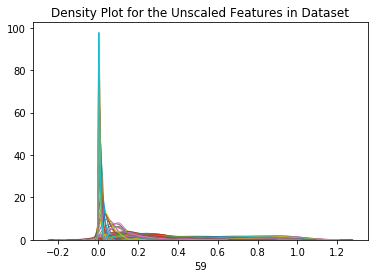

In [16]:
# Iterate through the features
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    
plt.title('Density Plot for the Unscaled Features in Dataset')

In [17]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)
print("x shape: ",x.shape)


x shape:  (208, 60)


Text(0.5, 1.0, 'Density Plot for Sonar scaled Features in Dataset')

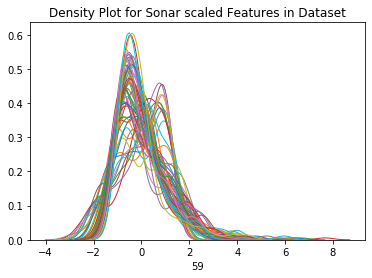

In [18]:
# Iterate through the features
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    
plt.title('Density Plot for Sonar scaled Features in Dataset')

Number of 0:  99
Number of 1 :  109


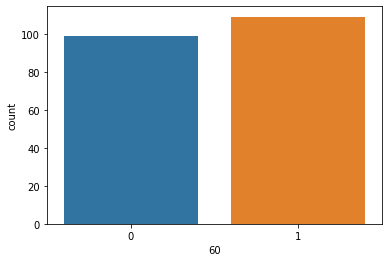

In [19]:
ax = sns.countplot(y,label="Count") 
o, z = y.value_counts()
print('Number of 0: ',z)
print('Number of 1 : ',o)

Plot some sample images along with their labels.

In [20]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,208.000000
mean,1.259676e-16,-1.708035e-17,-2.860959e-16,6.565261e-17,4.270089e-18,3.416071e-17,2.540703e-16,2.135044e-16,1.964241e-16,2.562053e-17,...,1.024821e-16,-1.665335e-16,1.024821e-16,-2.348549e-16,3.736327e-17,-1.110223e-16,1.878839e-16,-1.195625e-16,-1.216975e-16,0.000000
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413
min,-1.183116e+00,-1.156214e+00,-1.118120e+00,-9.949667e-01,-1.199456e+00,-1.601829e+00,-1.807042e+00,-1.484890e+00,-1.370317e+00,-1.327406e+00,...,-1.185540e+00,-1.354626e+00,-1.334996e+00,-1.348450e+00,-1.320799e+00,-1.442634e+00,-1.251480e+00,-1.262764e+00,-1.143603e+00,-1.024552
25%,-7.056588e-01,-7.471336e-01,-6.991299e-01,-6.428621e-01,-6.778783e-01,-7.133108e-01,-5.869469e-01,-6.372200e-01,-6.614144e-01,-7.114643e-01,...,-6.996136e-01,-6.988984e-01,-7.836352e-01,-7.532933e-01,-7.756190e-01,-6.946015e-01,-7.420027e-01,-7.472279e-01,-6.223295e-01,-0.653959
50%,-3.043475e-01,-2.445492e-01,-2.737717e-01,-2.928166e-01,-1.904398e-01,-1.885136e-01,-2.874616e-01,-2.591733e-01,-2.403004e-01,-2.032221e-01,...,-2.022988e-01,-2.128888e-01,-2.184901e-01,-2.507163e-01,-2.526913e-01,-2.137235e-01,-3.555025e-01,-2.490204e-01,-2.850347e-01,-0.291423
75%,4.355059e-01,4.713415e-01,3.935567e-01,3.022607e-01,3.311383e-01,3.826146e-01,4.349952e-01,4.352820e-01,4.334413e-01,3.691357e-01,...,3.405716e-01,3.425507e-01,5.120633e-01,4.370208e-01,4.742152e-01,5.298563e-01,5.404752e-01,5.741050e-01,1.902443e-01,0.252381
max,4.398198e+00,5.660819e+00,6.635115e+00,7.665570e+00,6.261955e+00,3.514510e+00,3.431078e+00,3.839464e+00,4.119611e+00,3.617419e+00,...,6.323535e+00,5.855802e+00,3.834014e+00,3.174743e+00,4.168087e+00,4.292281e+00,4.247363e+00,5.218265e+00,4.406429e+00,5.952253


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

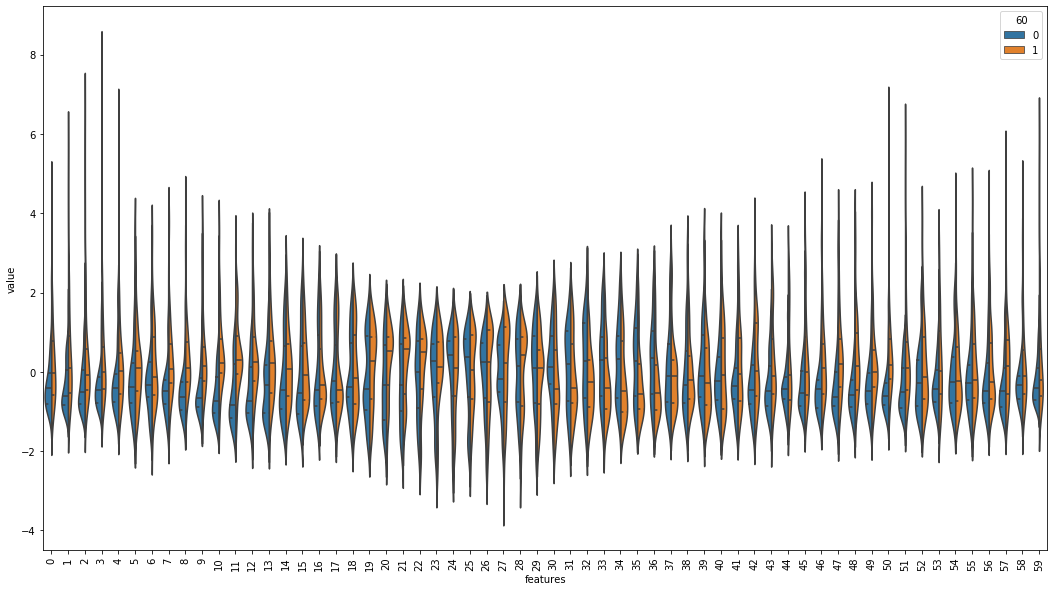

In [34]:
# Violin plot
data_dia = y
data_n_2 = x
#data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:61]],axis=1) # 

data = pd.melt(data,id_vars=[60],
                    var_name="features",
                    value_name='value')
#data
plt.figure(figsize=(18,10))
sns.violinplot(x="features", y="value", hue=60, data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Now we have processed the data, let's start building our multi-layer perceptron using tensorflow. We will begin by importing the required libraries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

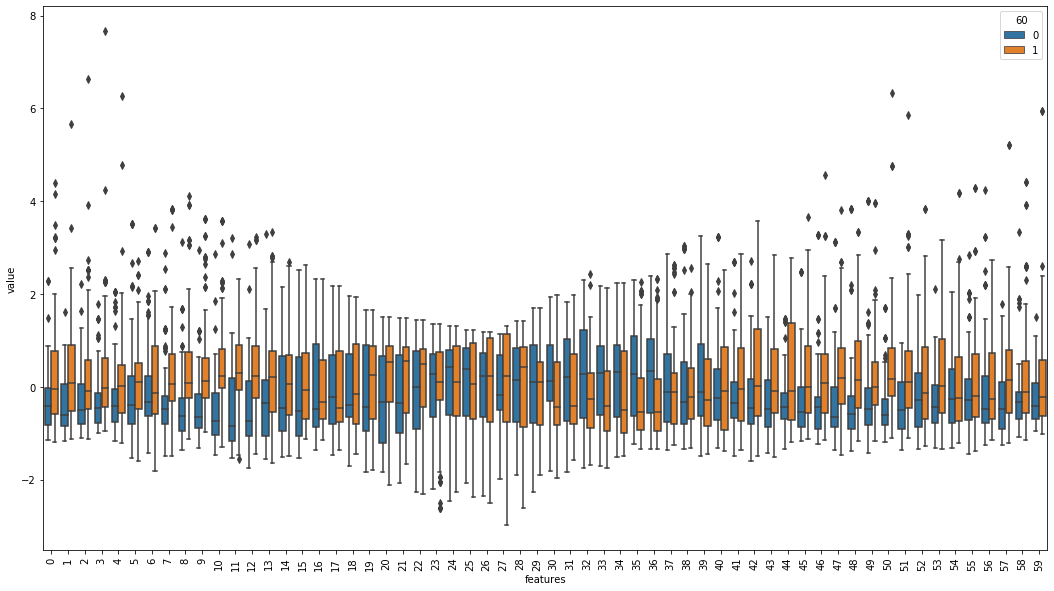

In [35]:
# As an alternative of violin plot, box plot can be used
plt.figure(figsize=(18,10))
sns.boxplot(x="features", y="value", hue=60, data=data)
plt.xticks(rotation=90)

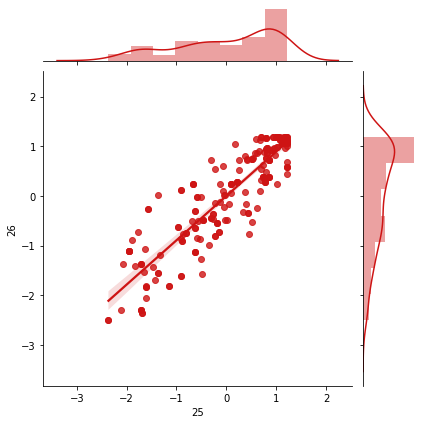

In [40]:
sns.jointplot(x.loc[:,25], x.loc[:,26], kind="regg", color="#ce1414")
# The #25 and #26 are somewhat linearly correlated 

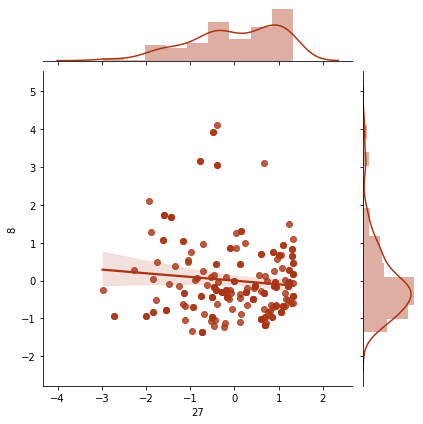

In [47]:
sns.jointplot(x.loc[:,27], x.loc[:,8], kind="regg", color="#aa3514")
# the dependency between 27 and 8 is not that obvious

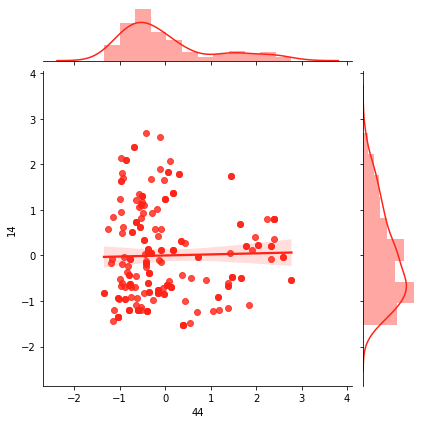

In [46]:
sns.jointplot(x.loc[:,44], x.loc[:,14], kind="regg", color="#ff2317")
# the 44 and 14 do not share covariance

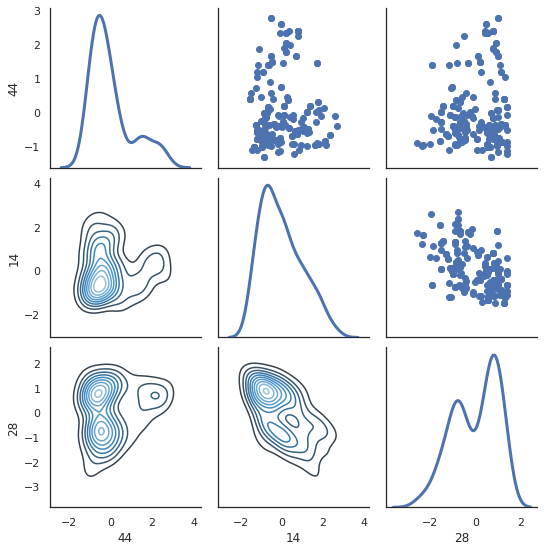

In [48]:
sns.set(style="white")
df = x.loc[:,[44,14,28]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

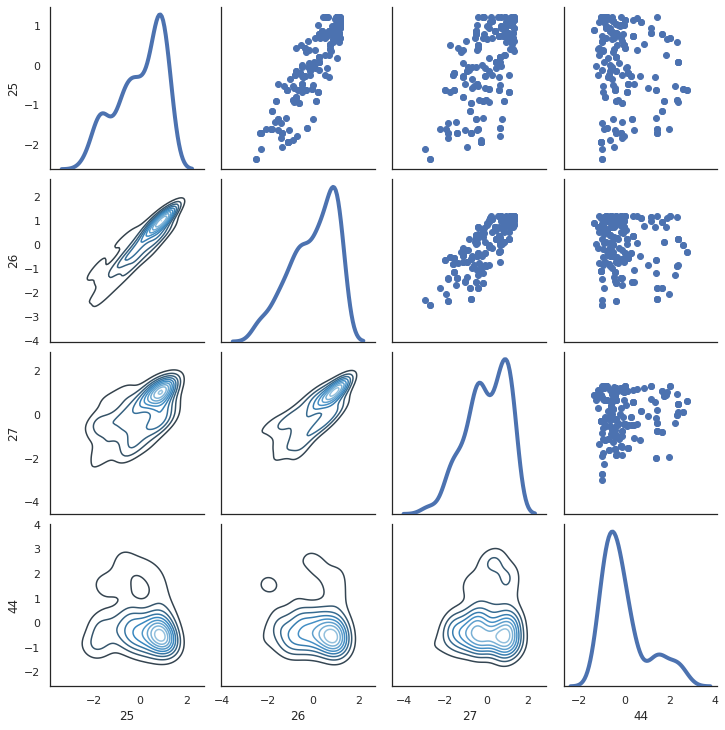

In [50]:
sns.set(style="white")
df = x.loc[:,[25,26,27,44]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

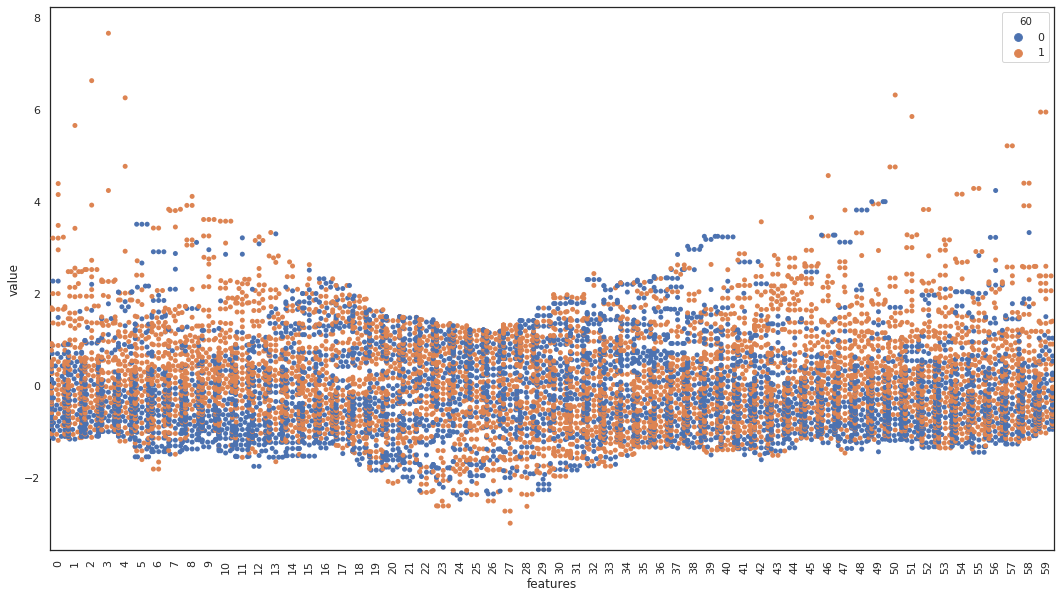

In [52]:

plt.figure(figsize=(18,10))
sns.swarmplot(x="features", y="value", hue=60, data=data)
plt.xticks(rotation=90)

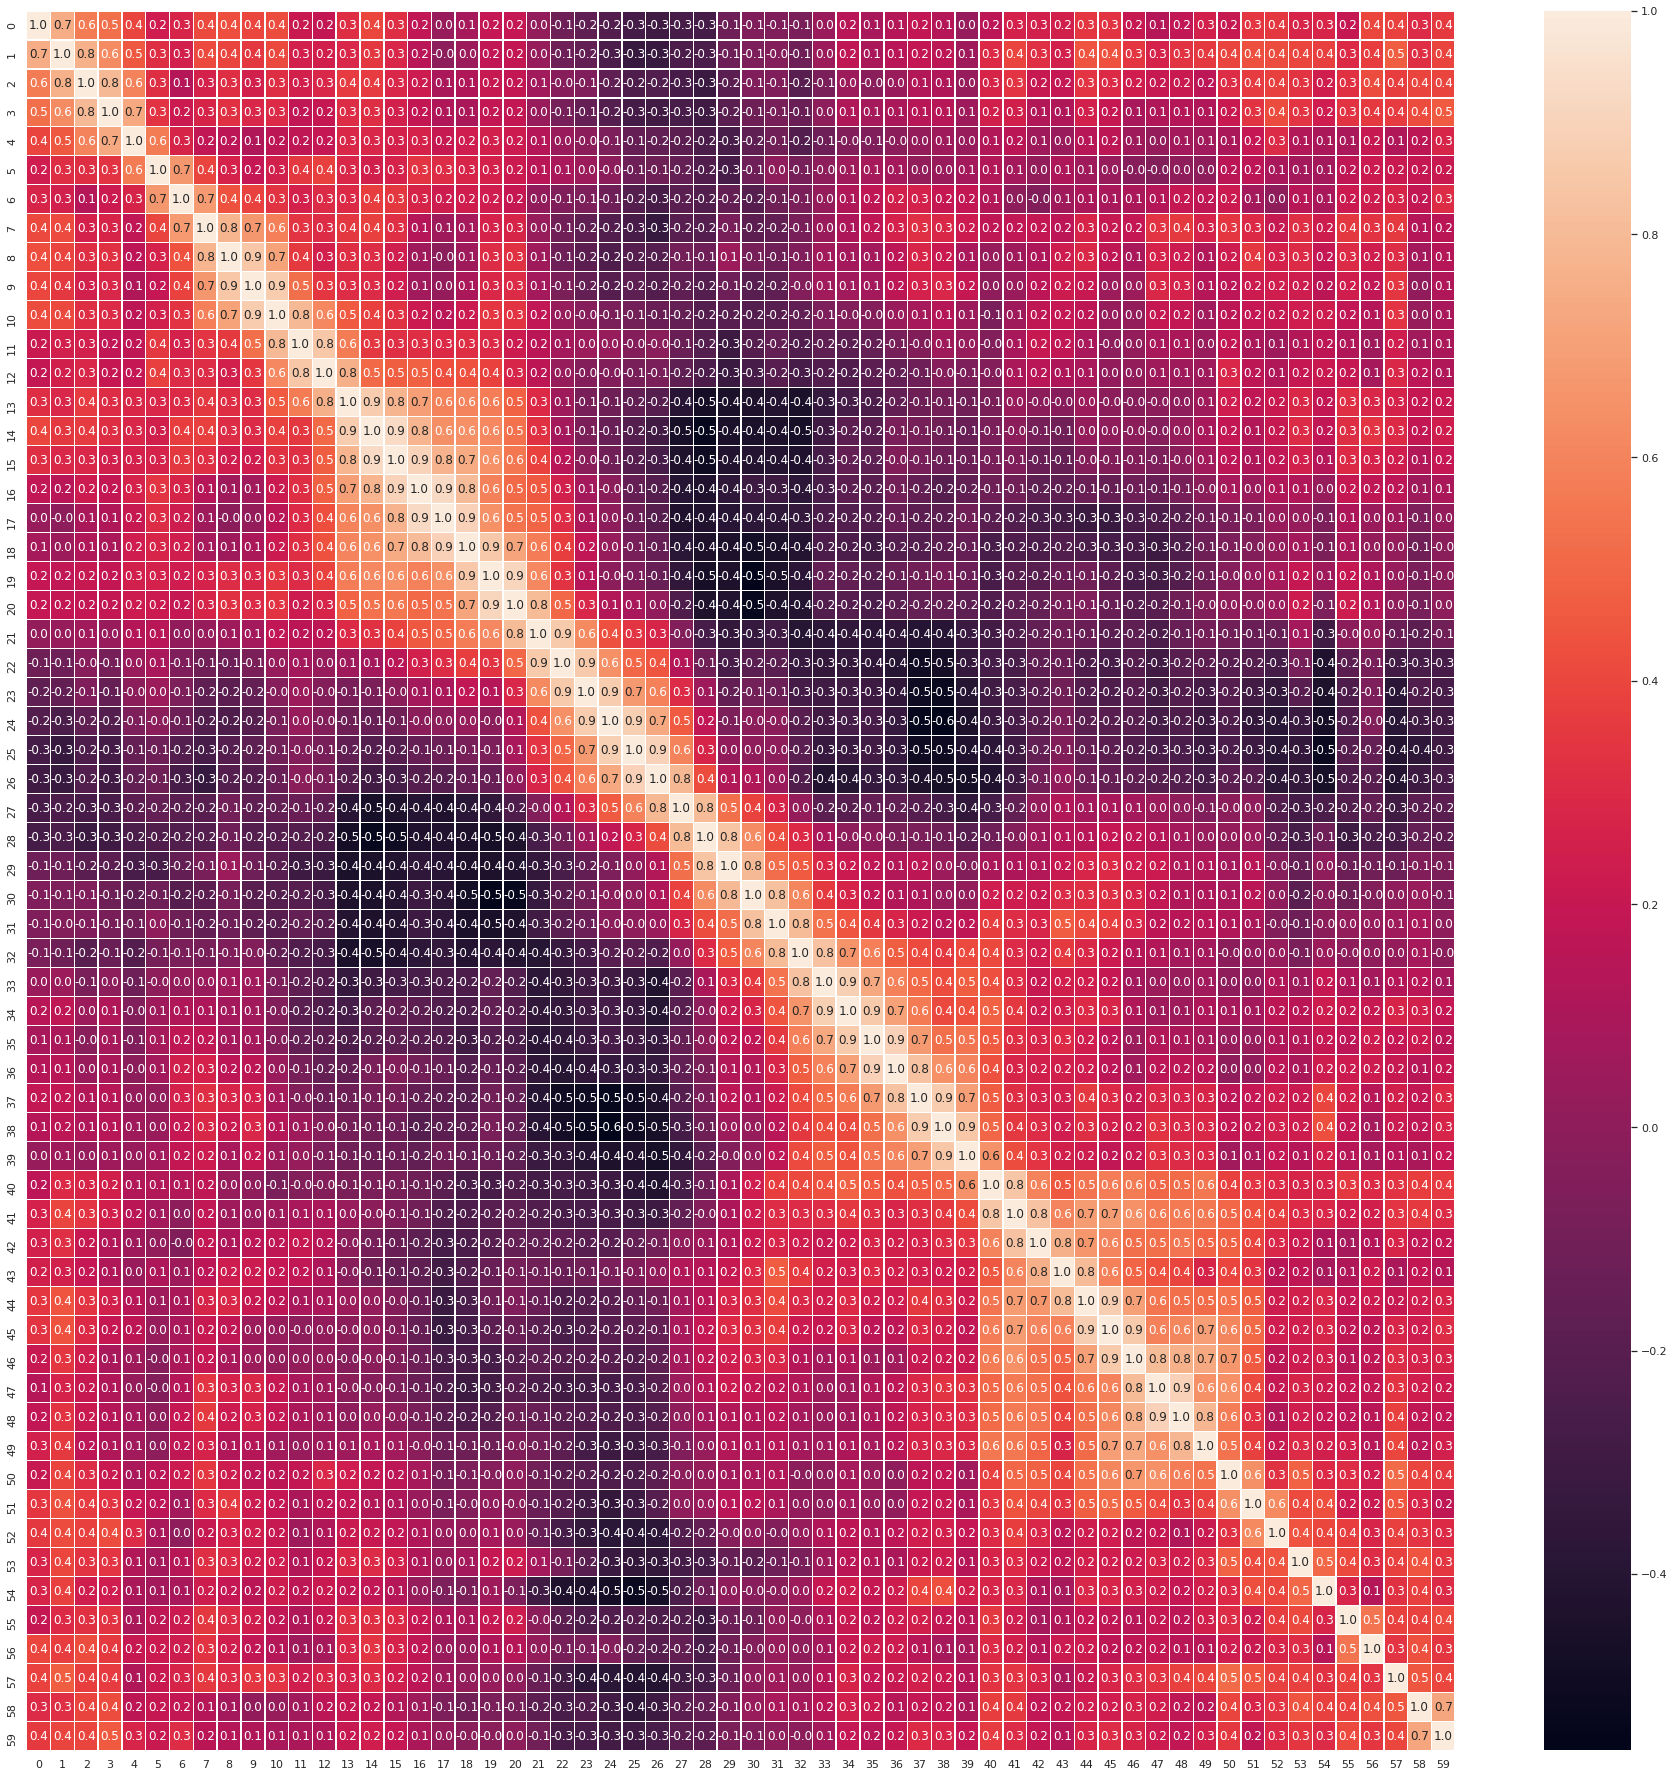

In [53]:
#correlation map
f,ax = plt.subplots(figsize=(32, 32))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)